In [49]:
# import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# import data

df = pd.read_excel('Junior Data Analyst _ Data.xlsx', header = 2)
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [51]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Hour,8760.0,11.5,0.0,5.75,11.5,17.25,23.0,6.922582
Date/hour start,8760,2020-07-02 07:37:13.972602624,2020-01-01 00:00:00,2020-04-02 05:45:00,2020-07-02 11:30:00,2020-10-01 17:15:00,2020-12-31 23:00:00,NaN
Solar electricity generation (kWh),8760.0,1.11675,0.0,0.0,0.024,1.27275,13.05,2.026098
Electricity usage (kWh),8760.0,7.312704,-12.624,0.3,0.621,1.686,46000.0,491.479806


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


In [53]:
# Checking data for outliers and duplicates
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Hour', ylabel='Solar electricity generation (kWh)'>

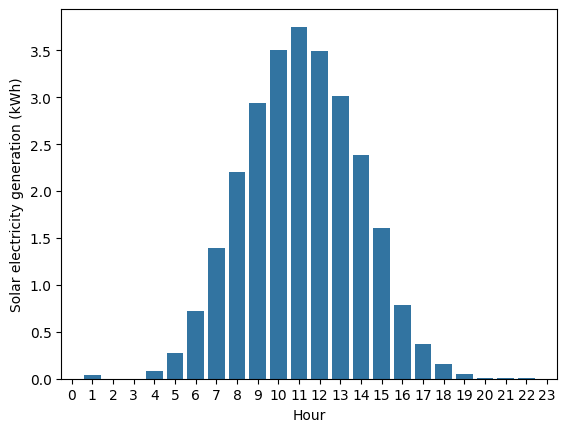

In [54]:
# Plotting the average solar electricity generated per hour
import seaborn as sns
hourly_solar = df.groupby('Hour')['Solar electricity generation (kWh)'].mean()
sns.barplot(hourly_solar)

It seems unlikely to have sunlight at 1 AM in the morning. Let us investigate this further.

In [55]:
df[(df['Hour']==1) & (df['Solar electricity generation (kWh)']>0)]

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2569,1,2020-04-18 01:00:00,13.05,0.315968


13kWh at 1AM seems highly unlikely, and we will therefore be dropping this instance.

In [56]:
df.drop(index = 2569, inplace = True)

Next, we would like to see any trends in the hourly electricity used.

<Axes: xlabel='Hour', ylabel='Electricity usage (kWh)'>

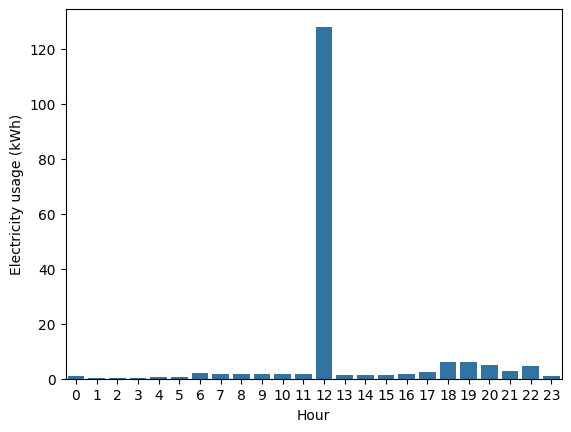

In [57]:
hourly_electricity = df.groupby('Hour')['Electricity usage (kWh)'].mean()
sns.barplot(hourly_electricity)

We seem to have an extreme outlier here.

In [58]:
df[df['Hour']==12]['Electricity usage (kWh)'].describe()

count      365.000000
mean       128.000444
std       2407.650952
min          0.000000
25%          0.246000
50%          0.483000
75%          0.921000
max      46000.000000
Name: Electricity usage (kWh), dtype: float64

Wow! The average consumption is 128 kWh and the median is 0.483 and the max is 46000.
This is definitely an outlier.

In [59]:
df[df['Electricity usage (kWh)']==46000].index

Index([276], dtype='int64')

In [60]:
df.drop(index = 276, inplace = True)

<Axes: xlabel='Hour', ylabel='Electricity usage (kWh)'>

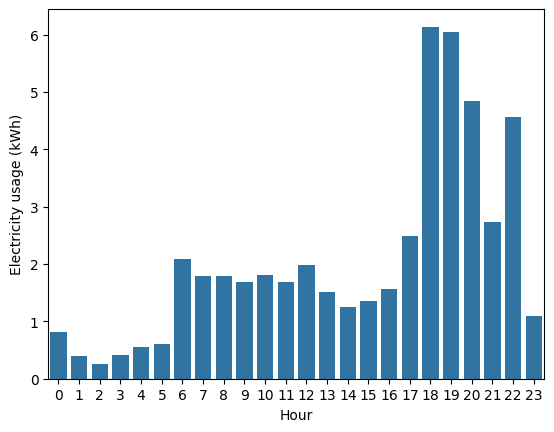

In [61]:
hourly_electricity = df.groupby('Hour')['Electricity usage (kWh)'].mean()
sns.barplot(hourly_electricity)

In [62]:
df[df['Hour']==12]['Electricity usage (kWh)'].describe()

count    364.000000
mean       1.978467
std        4.643379
min        0.000000
25%        0.246000
50%        0.481500
75%        0.921000
max       31.692000
Name: Electricity usage (kWh), dtype: float64

The min value for electricity consumption is a negative value which does not make sense. 